In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context(context='notebook')

In [2]:
matches_df = pd.read_csv('../data/raw/matches.csv')
matches_df.head()

,token,winning_team,mirror,ladder,patch,average_rating,map,map_size,num_players,server,duration
0,B2c2Ad6Uf6TVL5uk,2,False,RM_1v1,39515,1575.0,arabia,tiny,2,brazilsouth,0:23:30
1,eb8WdcbYlpeFLnoc,2,False,RM_TEAM,39515,2187.0,arabia,large,8,eastus,0:32:48
2,tphUBvZ8eZBmai0L,2,False,RM_TEAM,39515,2450.0,megarandom,large,8,brazilsouth,0:33:08
3,Kmhn0HZ8o8WwdXV9,1,False,RM_TEAM,39515,2387.0,arabia,large,8,ukwest,0:25:51
4,U198Wdc3kzJPBVqh,1,False,RM_1v1,37906,1095.0,acropolis,tiny,2,eastus,0:40:55


In [3]:
players_df = pd.read_csv('../data/raw/match_players.csv')
players_df.head()

,token,match,rating,color,civ,team,winner
0,rFWxLAdY6TF78xlo,axps4XstiBOmrDeG,1565.0,Red,Chinese,1,False
1,zsyvxRyzLh85YIba,axps4XstiBOmrDeG,1600.0,Blue,Goths,2,True
2,CHrJISNtjKDKM114,uQdosqwC7uiQ78ya,2145.0,Orange,Incas,1,False
3,X147inwVdQuaegxT,uQdosqwC7uiQ78ya,2124.0,Green,Tatars,2,True
4,kNckdaCe6pjKm6Au,uQdosqwC7uiQ78ya,2105.0,Red,Magyars,1,False


## **Let's start with exploring the Matches Dataset**
***

In [4]:
matches_df.shape

(3153767, 11)

In [5]:
matches_df.describe(include='all')

,token,winning_team,mirror,ladder,patch,average_rating,map,map_size,num_players,server,duration
count,3153767,3.153767e+06,3153767,3153767,3.153767e+06,2.990459e+06,3153767,3153767,3.153767e+06,3153767,3153767
unique,3153767,NaN,2,2,NaN,NaN,47,4,NaN,9,62123
top,B2c2Ad6Uf6TVL5uk,NaN,False,RM_1v1,NaN,NaN,arabia,tiny,NaN,ukwest,0:31:29
freq,1,NaN,3005287,2152662,NaN,NaN,1174357,2153142,NaN,1462621,5189
mean,NaN,1.506349e+00,NaN,NaN,3.914588e+04,1.271157e+03,NaN,NaN,3.085992e+00,NaN,NaN
std,NaN,4.999731e-01,NaN,NaN,2.345165e+03,3.669538e+02,NaN,NaN,1.827453e+00,NaN,NaN
min,NaN,-1.000000e+00,NaN,NaN,3.558400e+04,1.010000e+02,NaN,NaN,2.000000e+00,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,3.690600e+04,1.012000e+03,NaN,NaN,2.000000e+00,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,3.951500e+04,1.198000e+03,NaN,NaN,2.000000e+00,NaN,NaN
75%,NaN,2.000000e+00,NaN,NaN,4.087400e+04,1.451000e+03,NaN,NaN,4.000000e+00,NaN,NaN


In [6]:
# Is there any null data?
(
matches_df
.isnull()
.sum()
 )


token                  0
winning_team           0
mirror                 0
ladder                 0
patch                  0
average_rating    163308
map                    0
map_size               0
num_players            0
server                 0
duration               0
dtype: int64

In [7]:
null_percentage = np.round((matches_df.isnull().sum().sum()*100)/(matches_df.shape[0]), 2)
print('The Percentage of null data is: {}%'.format(null_percentage))

The Percentage of null data is: 5.18%


We have **5,18%** of our data as **null**, all of it belonging to the _average_rating_ column, this is probably because, as the game's leaderboard interface states, the ELO (which is used to calculate the _average_rating_ column of the dataset) of a player is calculated after he has participated in at least in 10 games.  We will delete that 5%

We have to take into consideration that the ELO of players is discriminated betweeen 1vs1 and Team Match, so they can't be analyzed as beign equal.

*You can learn more about the ELO rating system **[here](https://en.wikipedia.org/wiki/Elo_rating_system)**

In [8]:
#droping the null values
matches_df = matches_df.dropna()
matches_df.shape

(2990459, 11)

In [9]:
# Whats the proportion of Games 
(
    matches_df
    .ladder
    .value_counts()
    )

ladder
RM_1v1     2078744
RM_TEAM     911715
Name: count, dtype: int64

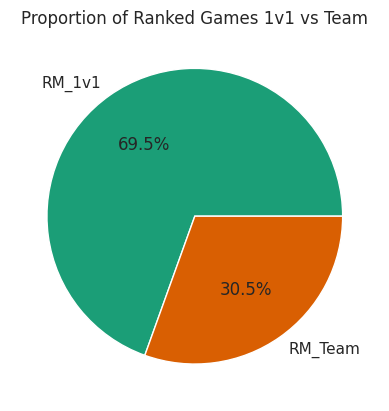

In [10]:
#Let's see the proportion of games in a graphic way

data = matches_df.ladder.value_counts()
data2 = [2078744, 911715]
labels =['RM_1v1', 'RM_Team']

palette_color = sns.color_palette('Dark2') 
plt.pie(data, labels=labels, colors=palette_color, autopct= '%1.1f%%')
plt.title('Proportion of Ranked Games 1v1 vs Team');




In [17]:
# Let's see the average ELO by Ladder
means_rm = matches_df.groupby(['ladder']).average_rating.mean()
means_rm



ladder
RM_1v1     1147.667255
RM_TEAM    1552.717196
Name: average_rating, dtype: float64

''

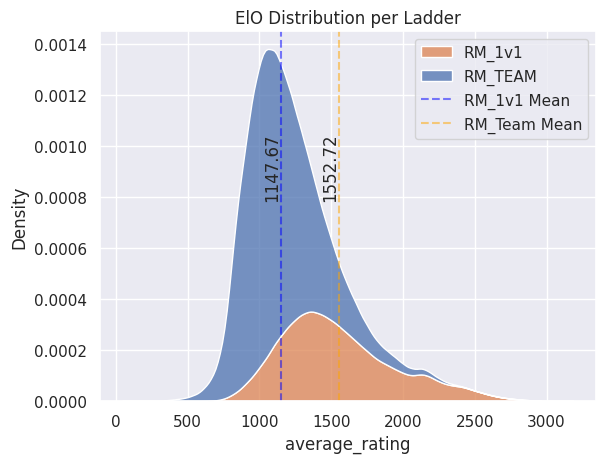

In [35]:
#let's see how it's the ELO distribution among players and Ladder
ax = sns.kdeplot(
     data = matches_df, 
     x='average_rating', 
     hue='ladder', 
     multiple="stack"
     )
plt.axvline(
    x=means_rm.iloc[0],
    linestyle='dashed',
    color= 'blue',
    alpha = 0.5
)
plt.axvline(
    x=means_rm.iloc[1],
    linestyle='dashed',
    color= 'orange',
    alpha = 0.5
)
ax.set_title('ElO Distribution per Ladder')
for i in range(len(means_rm)):
    ax.annotate(str(np.round(means_rm.iloc[i],2)),[means_rm.iloc[i],0.0008], rotation=90, ha='right')
ax.legend(labels=['RM_1v1','RM_TEAM', 'RM_1v1 Mean', 'RM_Team Mean'])
;

As we can see in the upper plot, the average ELO of the RM ladder is almost 400 points above the ELO of the 1v1 ladder, this could signify two things

- In the Ranked Team Match ladder, the average ELO is higher since the responsability of a game win or loss, relapses on all the players on the team making the collective effort to compensate the mistakes of individual players (since it's mean higher than the Ranked 1v1). Contrary to the 1v1 Ladder, when there is no change for other player to compensate an error.
- In the 1v1 Ladder the possibility of victory is much more realiable on a good pick of civilization, map and strategy. Meaning that the player must have the knowledge to apply the correct combo and the skill required to execute it.

In [72]:
server_counts = dict(matches_df.server.value_counts())
server_counts

{'ukwest': 1386196,
 'eastus': 561528,
 'brazilsouth': 449770,
 'westindia': 157264,
 'southeastasia': 140361,
 'westus2': 115072,
 'australiasoutheast': 79685,
 'westeurope': 65546,
 'koreacentral': 35037}

''

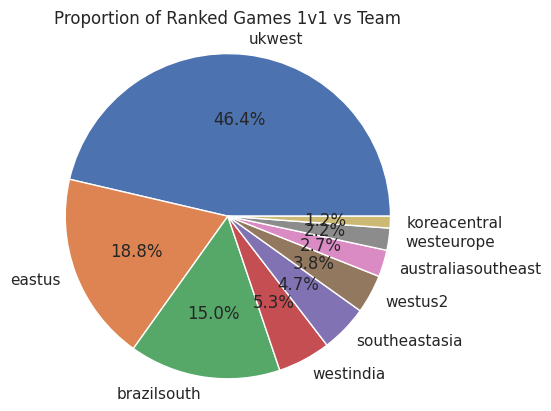

In [107]:
plt.pie(server_counts.values(), labels=server_counts.keys(), autopct= '%1.1f%%', radius = 1.1)
plt.title('Proportion of Ranked Games 1v1 vs Team', loc = 'center');

;